## Best Practices for Data Preprocessing

#### Always Explore & Visualize Data First

In [17]:
# Task 1: Summary Statistics





# Task 2: Visualize Data Distribution





# Task 3: Checking for Null Values




Summary Statistics:
              Age       Salary
count   8.000000      8.00000
mean   32.250000  56250.00000
std     7.667184   5418.22322
min    22.000000  48000.00000
25%    27.250000  51500.00000
50%    31.500000  58500.00000
75%    36.250000  60250.00000
max    45.000000  62000.00000


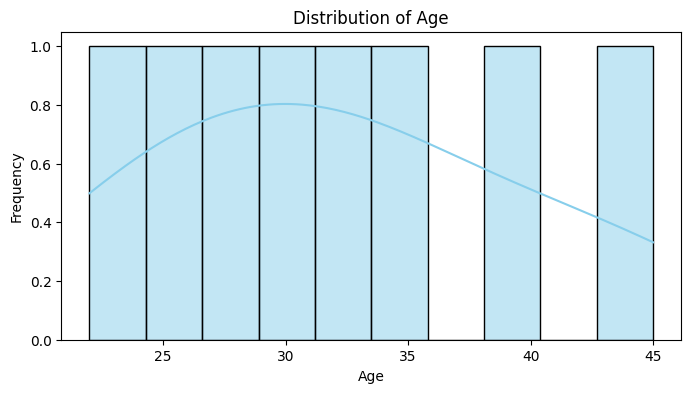

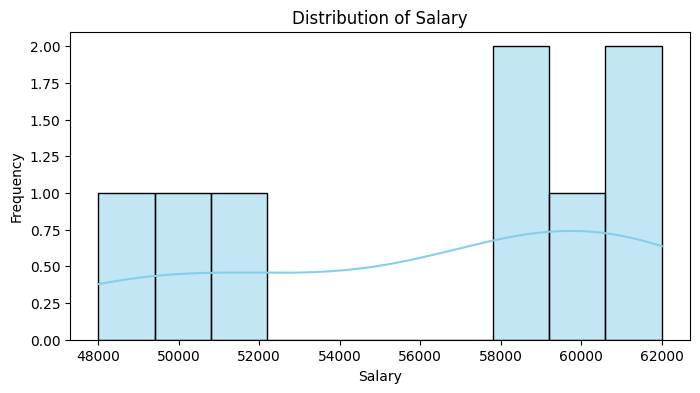

Null Values per Column:
 Age       2
Salary    2
dtype: int64


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = pd.DataFrame({
    'Age': [25, 30, 22, 40, None, 28, 35, None, 45, 33],
    'Salary': [50000, 48000, 52000, None, 61000, 58000, None, 60000, 62000, 59000]
})

# Task 1: Summary Statistics
def summary_statistics(df):
    print("Summary Statistics:\n", df.describe())

# Task 2: Visualize Data Distribution
def visualize_distribution(df, column):
    plt.figure(figsize=(8,4))
    sns.histplot(df[column], kde=True, bins=10, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Task 3: Checking for Null Values
def check_null_values(df):
    null_counts = df.isnull().sum()
    print("Null Values per Column:\n", null_counts)

# Example Usage
summary_statistics(data)
visualize_distribution(data, 'Age')
visualize_distribution(data, 'Salary')
check_null_values(data)


## Handle Missing & Inconsistent Data Before Applying ML Models

In [19]:
# Task 4: Drop Missing Values





# Task 5: Fill Missing Values




# Task 6: Handling Outliers with Capping





In [20]:
import pandas as pd
import numpy as np

# Sample data with missing values and outliers
data = pd.DataFrame({
    'Age': [25, 30, 22, 40, np.nan, 28, 120, np.nan, 45, 33],
    'Salary': [50000, 48000, 52000, np.nan, 61000, 58000, 700000, 60000, 62000, 59000]
})

print("Original Data:\n", data)

# Task 4: Drop Missing Values
def drop_missing(df):
    return df.dropna()

# Task 5: Fill Missing Values (mean imputation)
def fill_missing(df):
    return df.fillna(df.mean())

# Task 6: Handling Outliers with Capping (Winsorization using 5th and 95th percentiles)
def cap_outliers(df, column):
    lower = df[column].quantile(0.05)
    upper = df[column].quantile(0.95)
    df[column] = np.where(df[column] < lower, lower, df[column])
    df[column] = np.where(df[column] > upper, upper, df[column])
    return df

# Demonstrate tasks
data_dropped = drop_missing(data)
print("\nAfter Dropping Missing Values:\n", data_dropped)

data_filled = fill_missing(data)
print("\nAfter Filling Missing Values:\n", data_filled)

# Apply capping on 'Age' and 'Salary' columns
data_capped = cap_outliers(data_filled.copy(), 'Age')
data_capped = cap_outliers(data_capped, 'Salary')
print("\nAfter Outlier Capping:\n", data_capped)


Original Data:
      Age    Salary
0   25.0   50000.0
1   30.0   48000.0
2   22.0   52000.0
3   40.0       NaN
4    NaN   61000.0
5   28.0   58000.0
6  120.0  700000.0
7    NaN   60000.0
8   45.0   62000.0
9   33.0   59000.0

After Dropping Missing Values:
      Age    Salary
0   25.0   50000.0
1   30.0   48000.0
2   22.0   52000.0
5   28.0   58000.0
6  120.0  700000.0
8   45.0   62000.0
9   33.0   59000.0

After Filling Missing Values:
        Age         Salary
0   25.000   50000.000000
1   30.000   48000.000000
2   22.000   52000.000000
3   40.000  127777.777778
4   42.875   61000.000000
5   28.000   58000.000000
6  120.000  700000.000000
7   42.875   60000.000000
8   45.000   62000.000000
9   33.000   59000.000000

After Outlier Capping:
       Age         Salary
0  25.000   50000.000000
1  30.000   48900.000000
2  23.350   52000.000000
3  40.000  127777.777778
4  42.875   61000.000000
5  28.000   58000.000000
6  86.250  442500.000000
7  42.875   60000.000000
8  45.000   62000.0000

## Choose the Right Scaling Method

In [21]:
# Task 7: Min-Max Scaling







# Task 8: Robust Scaling






# Task 9: MaxAbs Scaling






In [22]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, RobustScaler, MaxAbsScaler

# Sample data with some outliers
data = pd.DataFrame({
    'Age': [25, 30, 22, 40, 28, 35, 120, 45, 33],
    'Salary': [50000, 48000, 52000, 61000, 58000, 700000, 60000, 62000, 59000]
})

print("Original Data:\n", data)

# Task 7: Min-Max Scaling (scales features to [0,1])
def min_max_scale(df):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df)
    return pd.DataFrame(scaled, columns=df.columns)

# Task 8: Robust Scaling (uses median and IQR, good with outliers)
def robust_scale(df):
    scaler = RobustScaler()
    scaled = scaler.fit_transform(df)
    return pd.DataFrame(scaled, columns=df.columns)

# Task 9: MaxAbs Scaling (scales by max absolute value, keeps sign, for sparse data)
def maxabs_scale(df):
    scaler = MaxAbsScaler()
    scaled = scaler.fit_transform(df)
    return pd.DataFrame(scaled, columns=df.columns)

# Applying each scaling
print("\nMin-Max Scaled Data:\n", min_max_scale(data))
print("\nRobust Scaled Data:\n", robust_scale(data))
print("\nMaxAbs Scaled Data:\n", maxabs_scale(data))


Original Data:
    Age  Salary
0   25   50000
1   30   48000
2   22   52000
3   40   61000
4   28   58000
5   35  700000
6  120   60000
7   45   62000
8   33   59000

Min-Max Scaled Data:
         Age    Salary
0  0.030612  0.003067
1  0.081633  0.000000
2  0.000000  0.006135
3  0.183673  0.019939
4  0.061224  0.015337
5  0.132653  1.000000
6  1.000000  0.018405
7  0.234694  0.021472
8  0.112245  0.016871

Robust Scaled Data:
         Age     Salary
0 -0.666667  -1.000000
1 -0.250000  -1.222222
2 -0.916667  -0.777778
3  0.583333   0.222222
4 -0.416667  -0.111111
5  0.166667  71.222222
6  7.250000   0.111111
7  1.000000   0.333333
8  0.000000   0.000000

MaxAbs Scaled Data:
         Age    Salary
0  0.208333  0.071429
1  0.250000  0.068571
2  0.183333  0.074286
3  0.333333  0.087143
4  0.233333  0.082857
5  0.291667  1.000000
6  1.000000  0.085714
7  0.375000  0.088571
8  0.275000  0.084286


## Keep Track of Data Transformations for Reproducibility

In [23]:
# Task 10: Log Data Preprocessing Steps






# Task 11: Store Transformation Parameters






In [24]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import json

# Sample data
data = pd.DataFrame({
    'Age': [25, 30, 22, 40, 28, 35, 120, 45, 33],
    'Salary': [50000, 48000, 52000, 61000, 58000, 700000, 60000, 62000, 59000]
})

# Dictionary to log steps and params
log = {
    "steps": [],
    "params": {}
}

# Task 10: Log Data Preprocessing Steps
def log_step(step_description):
    log["steps"].append(step_description)
    print(f"LOG: {step_description}")

# Example preprocessing step: Min-Max scaling
def min_max_scale_with_log(df):
    scaler = MinMaxScaler()
    scaled_array = scaler.fit_transform(df)
    log_step("Applied Min-Max scaling to all features.")
    # Task 11: Store Transformation Parameters
    # Store min and scale for each feature
    log["params"]["min"] = scaler.data_min_.tolist()
    log["params"]["scale"] = scaler.scale_.tolist()
    log["params"]["feature_names"] = df.columns.tolist()
    return pd.DataFrame(scaled_array, columns=df.columns), scaler

# Usage
scaled_data, scaler_obj = min_max_scale_with_log(data)
print("\nScaled Data:\n", scaled_data)

# Save log to JSON file (optional)
with open("preprocessing_log.json", "w") as f:
    json.dump(log, f, indent=4)

print("\nTransformation parameters stored in log:")
print(json.dumps(log, indent=4))


LOG: Applied Min-Max scaling to all features.

Scaled Data:
         Age    Salary
0  0.030612  0.003067
1  0.081633  0.000000
2  0.000000  0.006135
3  0.183673  0.019939
4  0.061224  0.015337
5  0.132653  1.000000
6  1.000000  0.018405
7  0.234694  0.021472
8  0.112245  0.016871

Transformation parameters stored in log:
{
    "steps": [
        "Applied Min-Max scaling to all features."
    ],
    "params": {
        "min": [
            22.0,
            48000.0
        ],
        "scale": [
            0.01020408163265306,
            1.5337423312883435e-06
        ],
        "feature_names": [
            "Age",
            "Salary"
        ]
    }
}
